<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1)

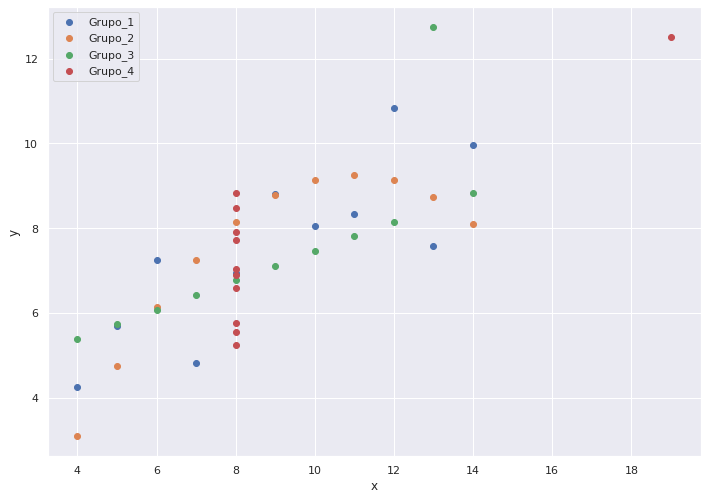

In [91]:
# Creamos los dataframes respectivos a cada grupo
df1 = df[0:11]
df2 = df[11:22]
df3 = df[22:33]
df4 = df[33:44]

# Creamos los vectores x,y respectivos de cada grupo
x1, y1 = df1["x"], df1["y"]
x2, y2 = df2["x"], df2["y"]
x3, y3 = df3["x"], df3["y"]
x4, y4 = df4["x"], df4["y"]

# Ploteamos cada grupo
plt.scatter(x1, y1, label='Grupo_1')
plt.scatter(x2, y2, label='Grupo_2')
plt.scatter(x3, y3, label='Grupo_3')
plt.scatter(x4, y4, label='Grupo_4')

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()

Se puede ver claramente que los grupos son muy distintos entre sí.

2)

In [101]:
print(df1.describe())
print(df2.describe())
print(df3.describe())
print(df4.describe())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

Podemos ver que el promedio y la desviació esandar son iguales en todos los grupos de datos, a pesar de que son muy distintos entre sí.

3)

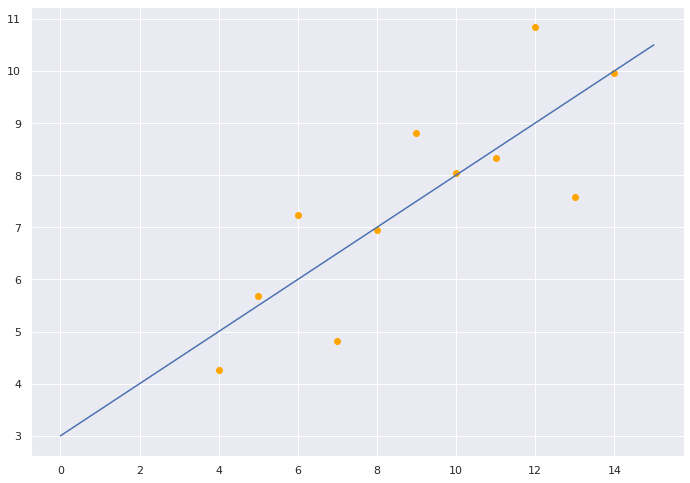

0.666542459508775

In [107]:
#Regresion lineal Grupo 1
modelo1 = np.poly1d(np.polyfit(x1, y1, 1))
curva1 = np.linspace(0, 15, 100)
plt.scatter(x1, y1,color="orange")
plt.plot(curva1, modelo1(curva1))
plt.show()
r2_score(y1, modelo1(x1))

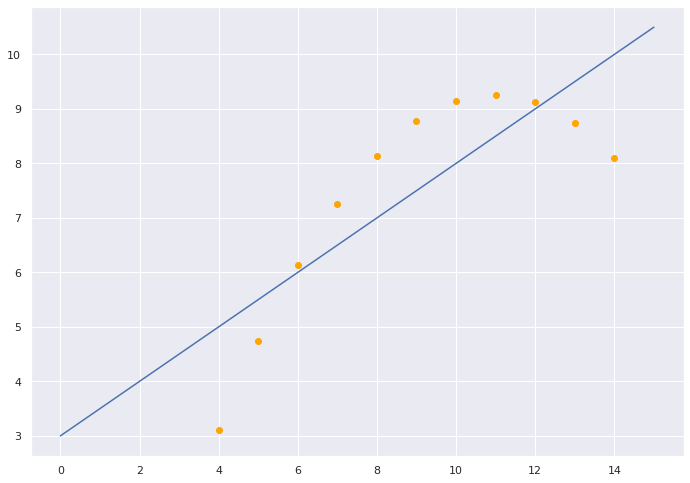

0.6662420337274844

In [109]:
# Regresion lineal Grupo 2
modelo2 = np.poly1d(np.polyfit(x2, y2, 1))
curva2 = np.linspace(0, 15, 100)
plt.scatter(x2, y2,color="orange")
plt.plot(curva2, modelo2(curva2))
plt.show()
r2_score(y2, modelo2(x2))

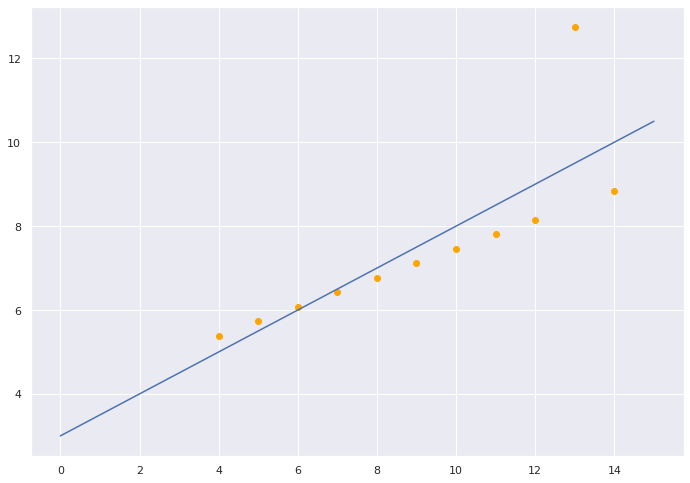

0.6663240410665593

In [111]:
# Regresion lineal Grupo 3
modelo3 = np.poly1d(np.polyfit(x3, y3, 1))
curva3 = np.linspace(0, 15, 100)
plt.scatter(x3, y3,color="orange")
plt.plot(curva3, modelo3(curva3))
plt.show()
r2_score(y3, modelo3(x3))

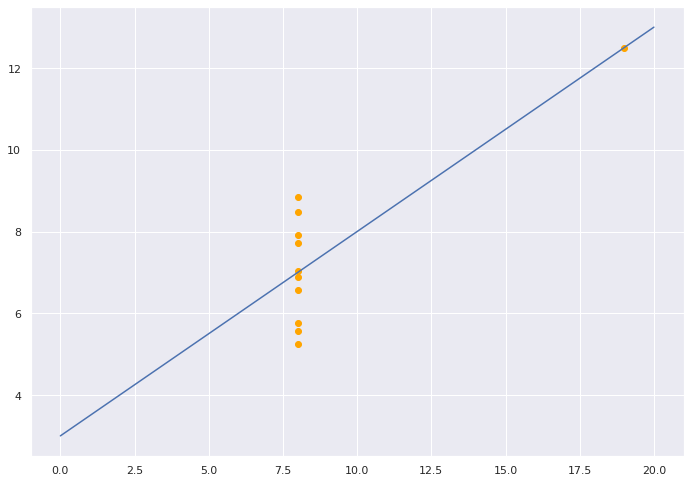

0.6667072568984653

In [112]:
# Regresion lineal Grupo 4
modelo4 = np.poly1d(np.polyfit(x4, y4, 1))
curva4 = np.linspace(0, 20, 100)
plt.scatter(x4, y4,color="orange")
plt.plot(curva4, modelo4(curva4))
plt.show()
r2_score(y4, modelo4(x4))

Podemos notar que r^2 es casi igual en todas las regresiones lineales, y se puede ver a simple vista que la linea de regresió lineal es casi igual en todos los grupos.


4)

In [40]:
def mae(y, yhat):
    """
    Calculo de la metrica: mean absolute error (MAE)
    """
    n = y.shape[0]
    metrica = sum(abs(y-yhat))/n
    return metrica

def rmse(y, yhat):
    """
    Calculo de la metrica: root mean squared error (RMSE)
    """
    n = y.shape[0]
    metrica = sum((y-yhat)**2)/n
    return metrica

def mape(y, yhat):
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    """
    n = y.shape[0]
    metrica = sum(abs((y-yhat)/y))/n
    return metrica

def smape(y, yhat):
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    """
    n = y.shape[0]
    metrica = sum(abs(y-yhat)/(abs(y)**2+abs(yhat)**2))/n
    return metrica

def rsquared(y, yhat):
    """
    Calculo del r-cuadrado
    """
    n = y.shape[0]
    prom_y = sum(y)/n
    metrica = sum((yhat-prom_y)**2)/sum((y-prom_y)**2)
    return metrica

In [ ]:
y1_pred = results.predict(sm.add_constant(x1))
mae1 = mae(np.array(y1), np.array(y1_pred))
rmse1 = rmse(np.array(y1), np.array(y1_pred))
mape1 = mape(np.array(y1), np.array(y1_pred))
smape1 = smape(np.array(y1), np.array(y1_pred))
rsquared1 = rsquared(np.array(y1), np.array(y1_pred))
print(f"El MAE es {mae1}, el RMSE es {rmse1}, el MAPE es {mape1}, el SMAPE es {smape1}, y el RSQUARED es {rsquared1}")

In [ ]:
y2_pred = results.predict(sm.add_constant(x2))
mae2 = mae(np.array(y2), np.array(y2_pred))
rmse2 = rmse(np.array(y2), np.array(y2_pred))
mape2 = mape(np.array(y2), np.array(y2_pred))
smape2 = smape(np.array(y2), np.array(y2_pred))
rsquared2 = rsquared(np.array(y2), np.array(y2_pred))
print(f"El MAE es {mae2}, el RMSE es {rmse2}, el MAPE es {mape2}, el SMAPE es {smape2}, y el RSQUARED es {rsquared2}")

In [ ]:
y3_pred = results.predict(sm.add_constant(x3))
mae3 = mae(np.array(y3), np.array(y3_pred))
rmse3 = rmse(np.array(y3), np.array(y3_pred))
mape3 = mape(np.array(y3), np.array(y3_pred))
smape3 = smape(np.array(y3), np.array(y3_pred))
rsquared3 = rsquared(np.array(y3), np.array(y3_pred))
print(f"El MAE es {mae3}, el RMSE es {rmse3}, el MAPE es {mape3}, el SMAPE es {smape3}, y el RSQUARED es {rsquared3}")

In [ ]:
y4_pred = results.predict(sm.add_constant(x4))
mae4 = mae(np.array(y4), np.array(y4_pred))
rmse4 = rmse(np.array(y4), np.array(y4_pred))
mape4 = mape(np.array(y4), np.array(y4_pred))
smape4 = smape(np.array(y4), np.array(y4_pred))
rsquared4 = rsquared(np.array(y4), np.array(y4_pred))
print(f"El MAE es {mae4}, el RMSE es {rmse4}, el MAPE es {mape4}, el SMAPE es {smape4}, y el RSQUARED es {rsquared4}")

5)

El modelo de regresión lineal para el primer grupo es correcto, para el segundo grupo un modelo mas acertado sería uno cuadrático, el cual esta a continuación.

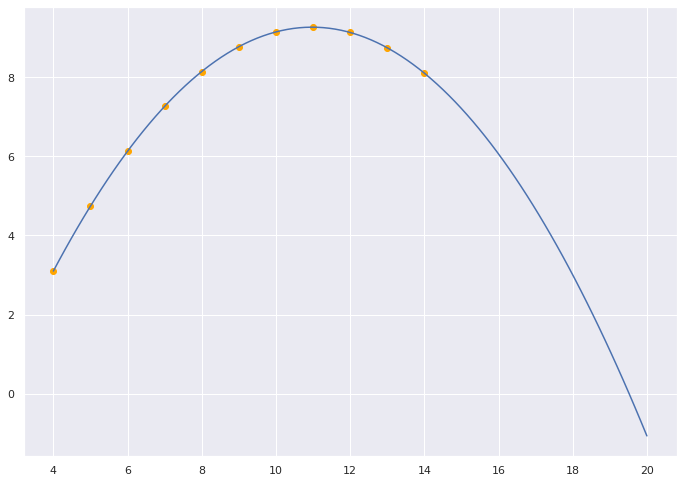

In [86]:
modelo_cuadratico = np.poly1d(np.polyfit(x2, y2, 2))
curva_cuadratica = np.linspace(4, 20, 100)
plt.scatter(x2, y2,color="orange")
plt.plot(curva_cuadratica, modelo_cuadratico(curva_cuadratica))
plt.show()

Para el tercer grupo, eliminaremos un dato aislado, para generar un modelo más exacto, como se muestra a continuación.

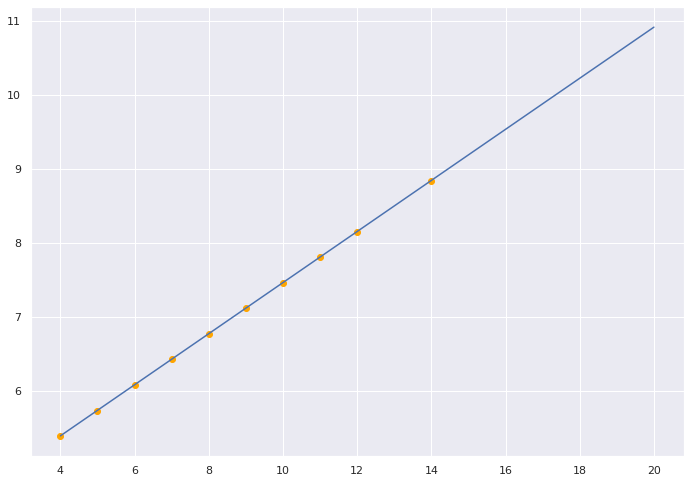

In [96]:
df3_sindato = df3.drop(24)
X3 = df3_sindato["x"]
Y3 = df3_sindato["y"]
modelo3 = np.poly1d(np.polyfit(X3, Y3, 1))
curva3 = np.linspace(4, 20, 100)
plt.scatter(X3, Y3,color="orange")
plt.plot(curva3, modelo3(curva3))
plt.show()

Y finalmente, para el cuarto grupo, dado que para x = 8, se tienen múltiples valores de y, podemos decir que no hay una correlación entre las variables. De todas formas, quitaremos el dato aislado y haremos una regresión lineal.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


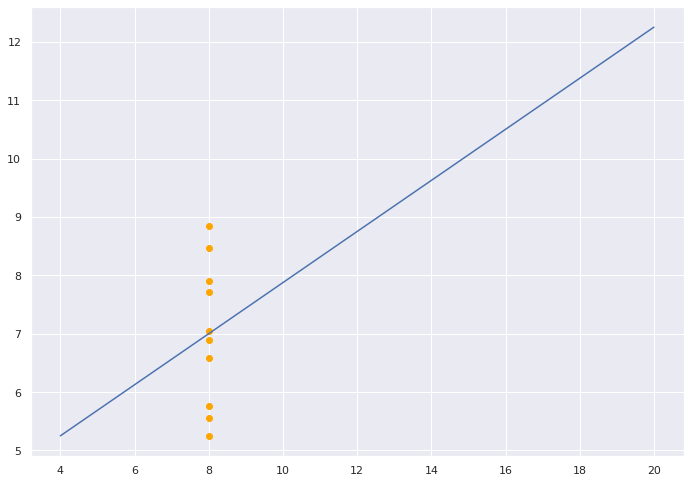

In [99]:
df4_sindato = df4.drop(40)
X4 = df4_sindato["x"]
Y4 = df4_sindato["y"]
modelo4 = np.poly1d(np.polyfit(X4, Y4, 1))
curva4 = np.linspace(4, 20, 100)
plt.scatter(X4, Y4,color="orange")
plt.plot(curva4, modelo4(curva4))
plt.show()

In [100]:
df4_sindato.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


x    8.000
y    7.001
dtype: float64

Podemos ver que cualquier recta que pase por el promedio de los y funciona para la regresión.